In [49]:
%matplotlib nbagg
import atomap.api as am
import numpy as np
import atomap.dummy_data as dummy_data
import scipy.ndimage
import matplotlib.patches 
from ncempy.io import dm
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import hyperspy.api as hs
#for fft plotting
from scipy import fftpack
from matplotlib.colors import LogNorm
#For filtering
import cv2
import os
#for peak detection

from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

<IPython.core.display.Javascript object>


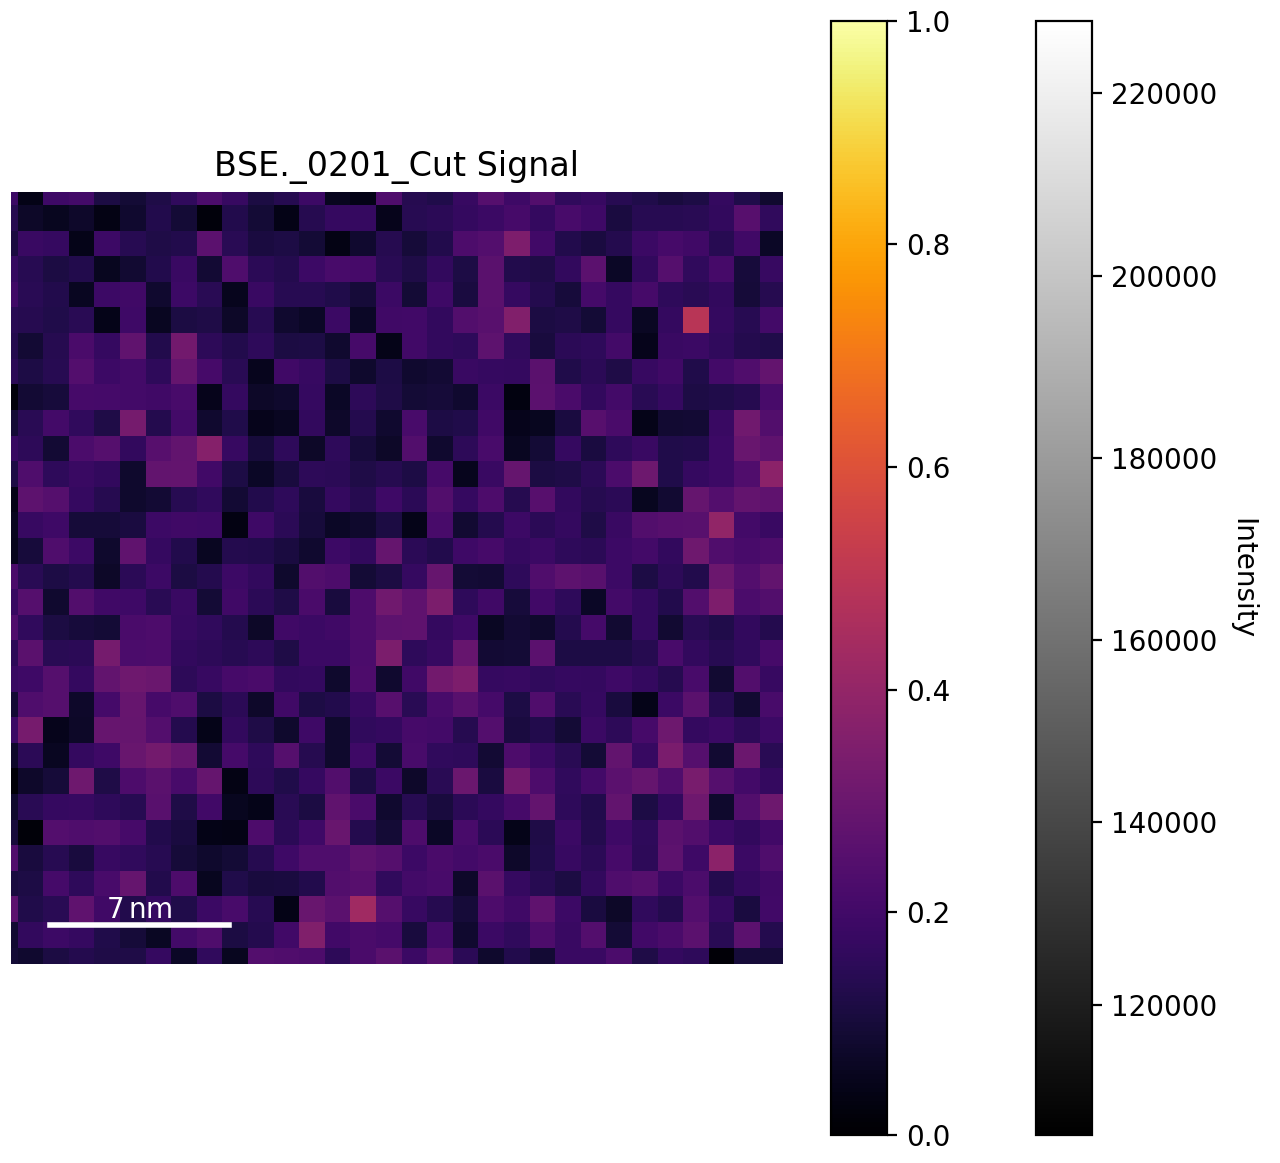

numpy.ndarray

In [50]:
im01 = hs.load('Data/BSE._0201_Cut.dm4')
im02 = hs.load('Data/BSE._0215_Cut.dm4')
im03 = hs.load('Data/BSE._0219_Cut.dm4')
im04 = hs.load('data/BSE._0211.dm4')
im01.plot()
type(im01.data)

In [15]:
#normalizing data:
norm_01 = (im01.data - im01.data.min())/np.ptp(im01.data)
norm_02 = (im02.data - im02.data.min())/np.ptp(im02.data)
norm_03 = (im03.data - im03.data.min())/np.ptp(im03.data)
norm_04 = (im04.data - im04.data.min())/np.ptp(im04.data)


1.0

In [51]:
#plotting normalized data and its fft

#plt.imshow(norm_01, cmap=plt.cm.inferno) #show the single image from the data file

plt.imshow(norm_02, cmap=plt.cm.inferno)

# scalebar = ScaleBar((im02['pixelSize'][0])*1e-9)  # 1 pixel = 2.2736310958862305e-11 meters
# plt.gca().add_artist(scalebar)
# scalebar.location = 'lower right'
# scalebar.box_alpha = 0.2
# scalebar.length_fraction = 0.2

plt.axis('off')
plt.colorbar()
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()
#plt.savefig('images/hrstem02.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


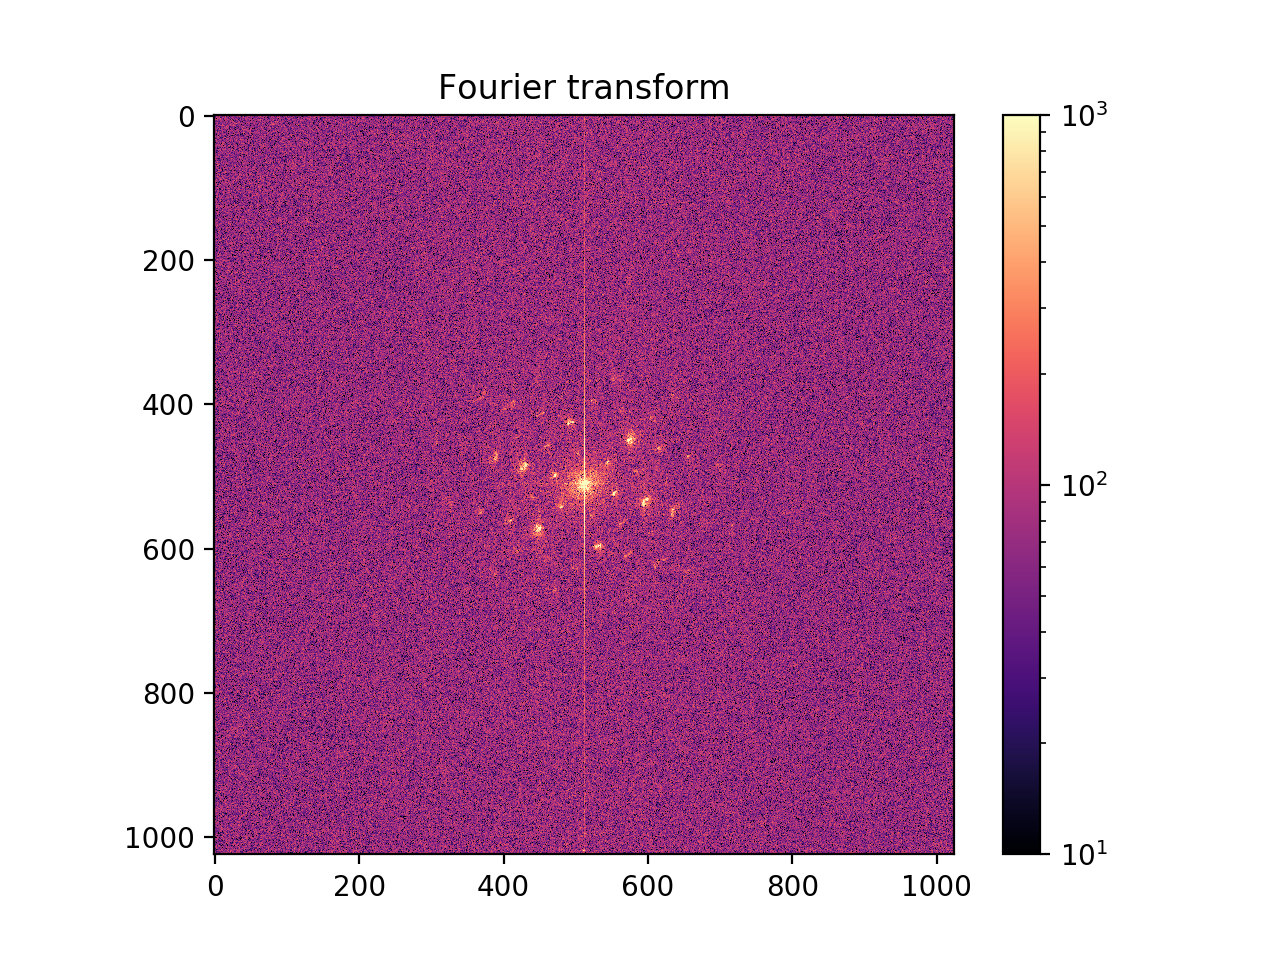

In [52]:
# FFT
# taking fft of all images
im01_fft = fftpack.fft2(norm_01)
im02_fft = fftpack.fft2(norm_02)
im03_fft = fftpack.fft2(norm_02)

def plot_spectrum(im02_fft):
    from matplotlib.colors import LogNorm
    
    # A logarithmic colormap
    plt.imshow(np.fft.fftshift(np.abs(im02_fft)), 
               norm=LogNorm(vmin=10, vmax = 1000), 
               cmap=plt.cm.magma)
               
    plt.colorbar()

plt.figure()
plot_spectrum(im02_fft)
plt.title('Fourier transform')

plt.show()

<IPython.core.display.Javascript object>


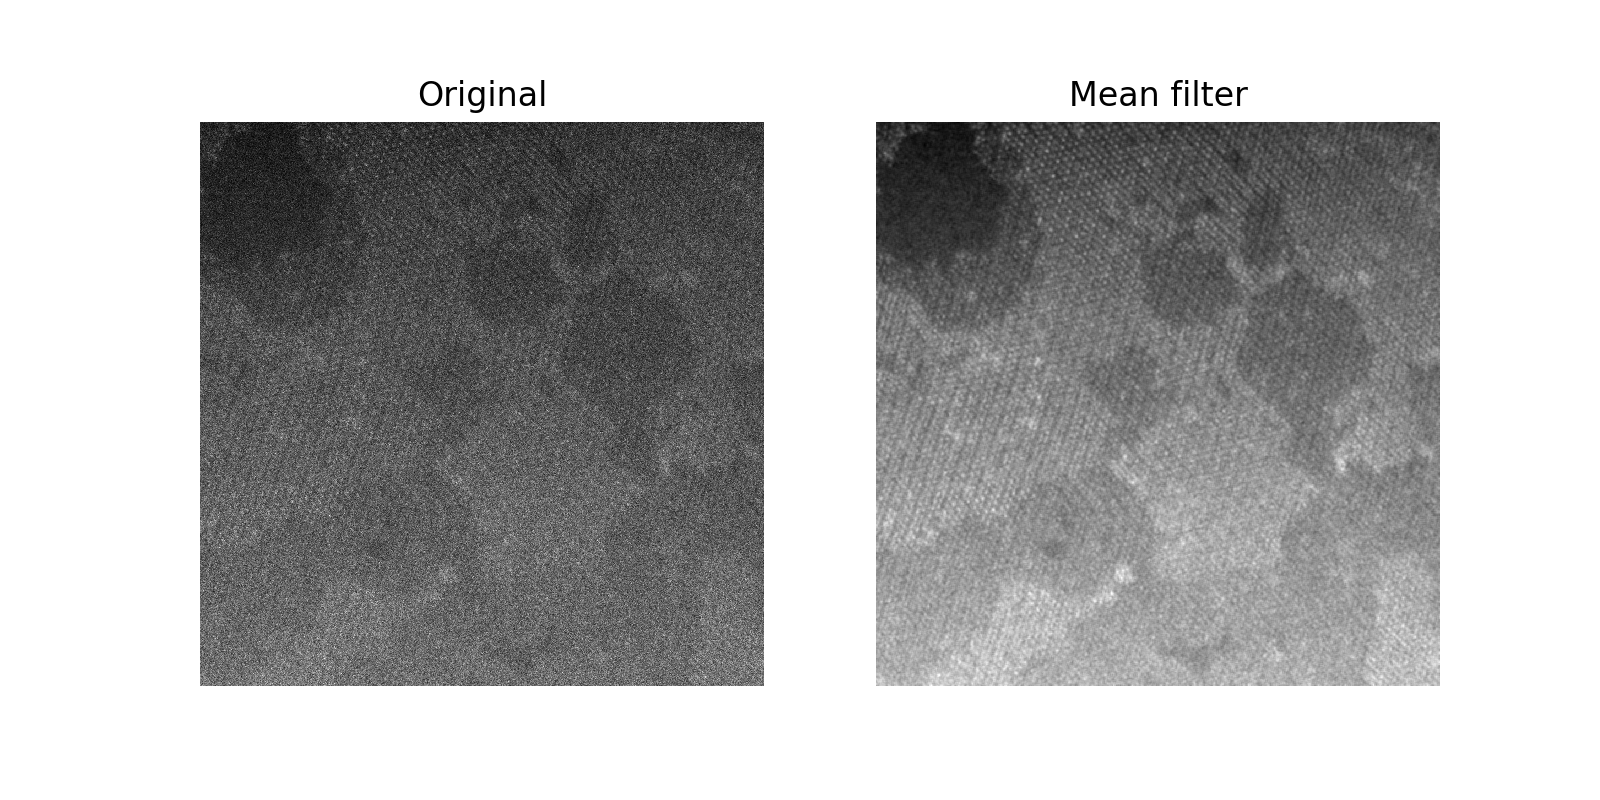

In [26]:
figure_size = 5
norm_02_filt = cv2.blur(norm_02,(figure_size, figure_size))

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(norm_02, cmap='gray'),plt.title('Original')
plt.axis('off')
#plt.colorbar()

plt.subplot(122) 
plt.imshow(norm_02_filt, cmap='gray'),plt.title('Mean filter')
plt.axis('off')
#plt.colorbar()

plt.show()

<IPython.core.display.Javascript object>


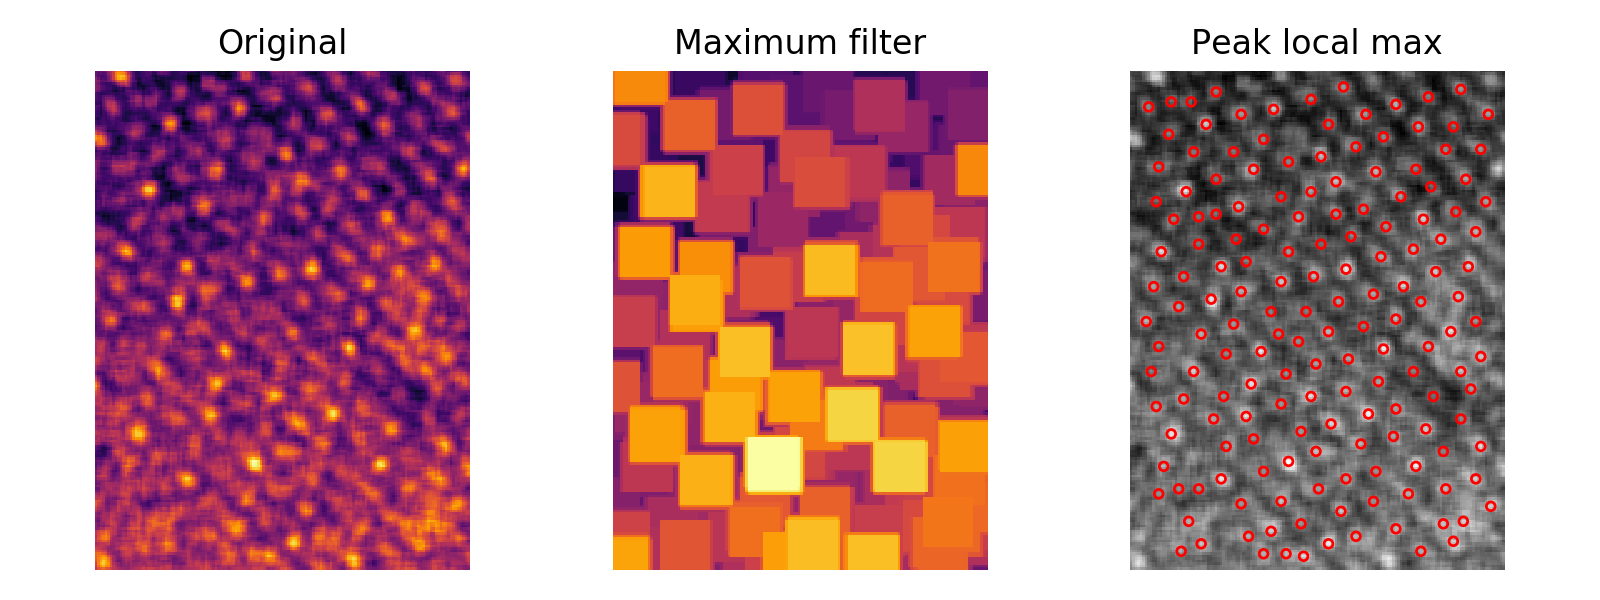

In [53]:
#im = new_image[120:420, 520:920]
im = norm_02_filt[50:250, 300:450]

# image_max is the dilation of im with a structuring element defined by 'size'

image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

# display results
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.inferno)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.inferno)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].scatter(coordinates[:, 1], coordinates[:, 0], s=10, facecolors='none', edgecolors='r')
#ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'b.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()
plt.savefig('images/peak_detection_hrstem01.png',transparent=True, bbox_inches='tight', pad_inches=0)

<IPython.core.display.Javascript object>


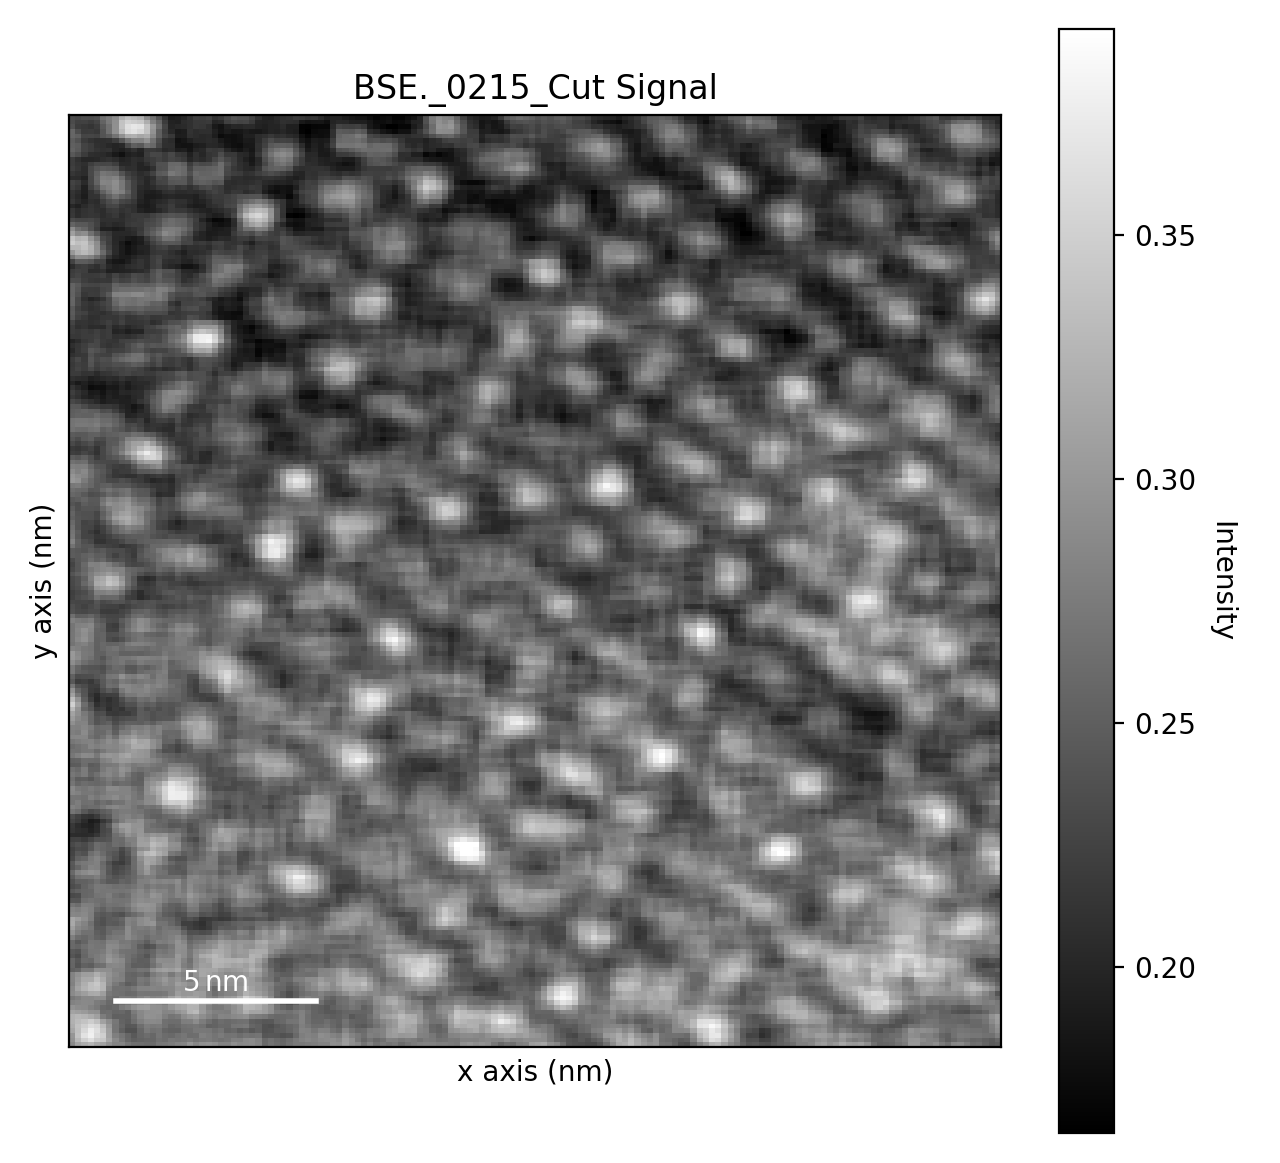

In [55]:
im02.data=im
#im02 = im02.isig[50:250, 300:450]
im02.plot()




  0%|          | 0/17 [00:00<?, ?it/s]


100%|██████████| 17/17 [00:00<00:00, 321.08it/s]


  0%|          | 0/206 [00:00<?, ?it/s]


100%|██████████| 206/206 [00:00<00:00, 5890.43it/s]

<IPython.core.display.Javascript object>


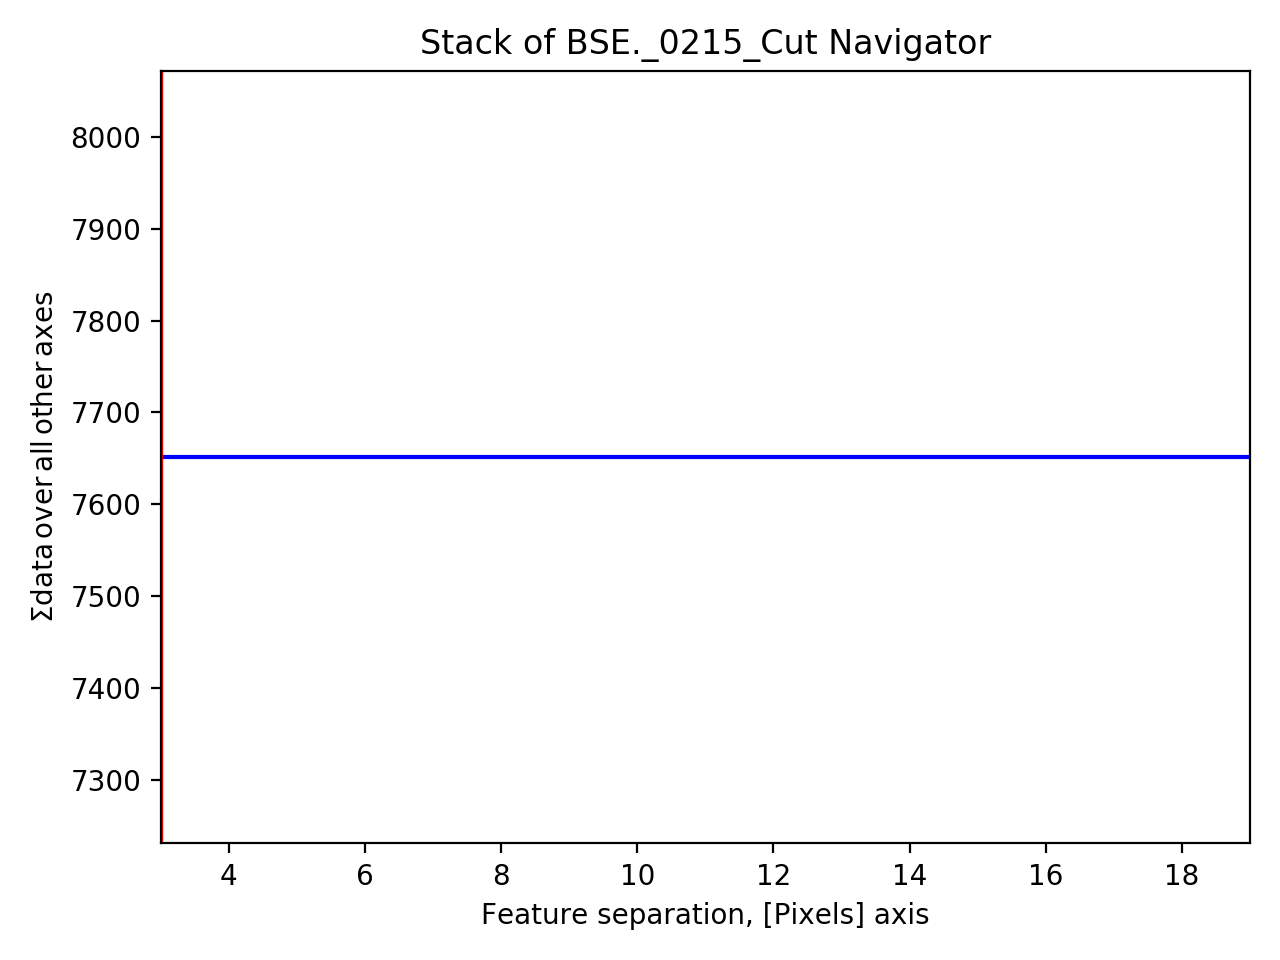

<IPython.core.display.Javascript object>


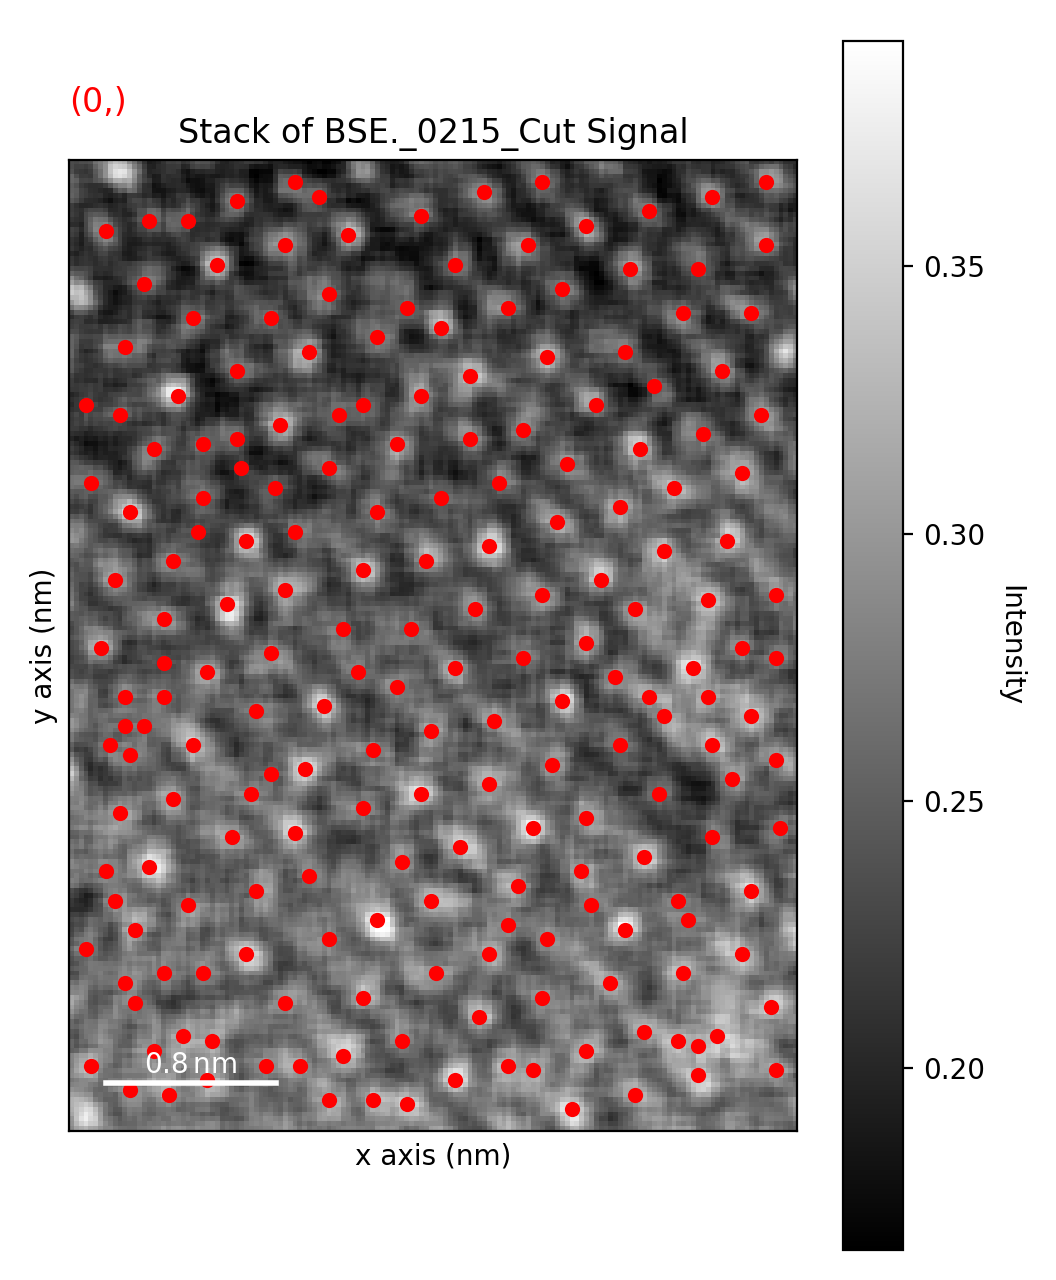

In [57]:
im02_peaks = am.get_feature_separation(im02, separation_range=(3, 20))
im02_peaks.plot()

In [59]:
atom_positions = am.get_atom_positions(im02, separation=5)
sublattice = am.Sublattice(atom_positions, image=im02.data)
sublattice

<Sublattice,  (atoms:165,planes:0)>

In [60]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()




Center of mass:   0%|          | 0/165 [00:00<?, ?it/s]


Center of mass: 100%|██████████| 165/165 [00:00<00:00, 6625.76it/s]


Gaussian fitting:   0%|          | 0/165 [00:00<?, ?it/s]


Gaussian fitting:   3%|▎         | 5/165 [00:00<00:03, 46.91it/s]


Gaussian fitting:   4%|▍         | 7/165 [00:00<00:07, 22.21it/s]


Gaussian fitting:   8%|▊         | 13/165 [00:00<00:05, 27.23it/s]


Gaussian fitting:  12%|█▏        | 19/165 [00:00<00:04, 31.95it/s]


Gaussian fitting:  15%|█▌        | 25/165 [00:00<00:03, 36.64it/s]


Gaussian fitting:  19%|█▉        | 32/165 [00:00<00:03, 41.91it/s]


Gaussian fitting:  24%|██▎       | 39/165 [00:00<00:02, 47.37it/s]


Gaussian fitting:  28%|██▊       | 47/165 [00:00<00:02, 52.64it/s]


Gaussian fitting:  33%|███▎      | 54/165 [00:01<00:01, 56.54it/s]


Gaussian fitting:  37%|███▋      | 61/165 [00:01<00:01, 59.12it/s]


Gaussian fitting:  41%|████      | 68/165 [00:01<00:01, 61.27it/s]


Gaussian fitting:  45%|████▌     | 75/165 [00:01<00:




  0%|          | 0/165 [00:00<?, ?it/s]


100%|██████████| 165/165 [00:00<00:00, 6419.67it/s]

<IPython.core.display.Javascript object>


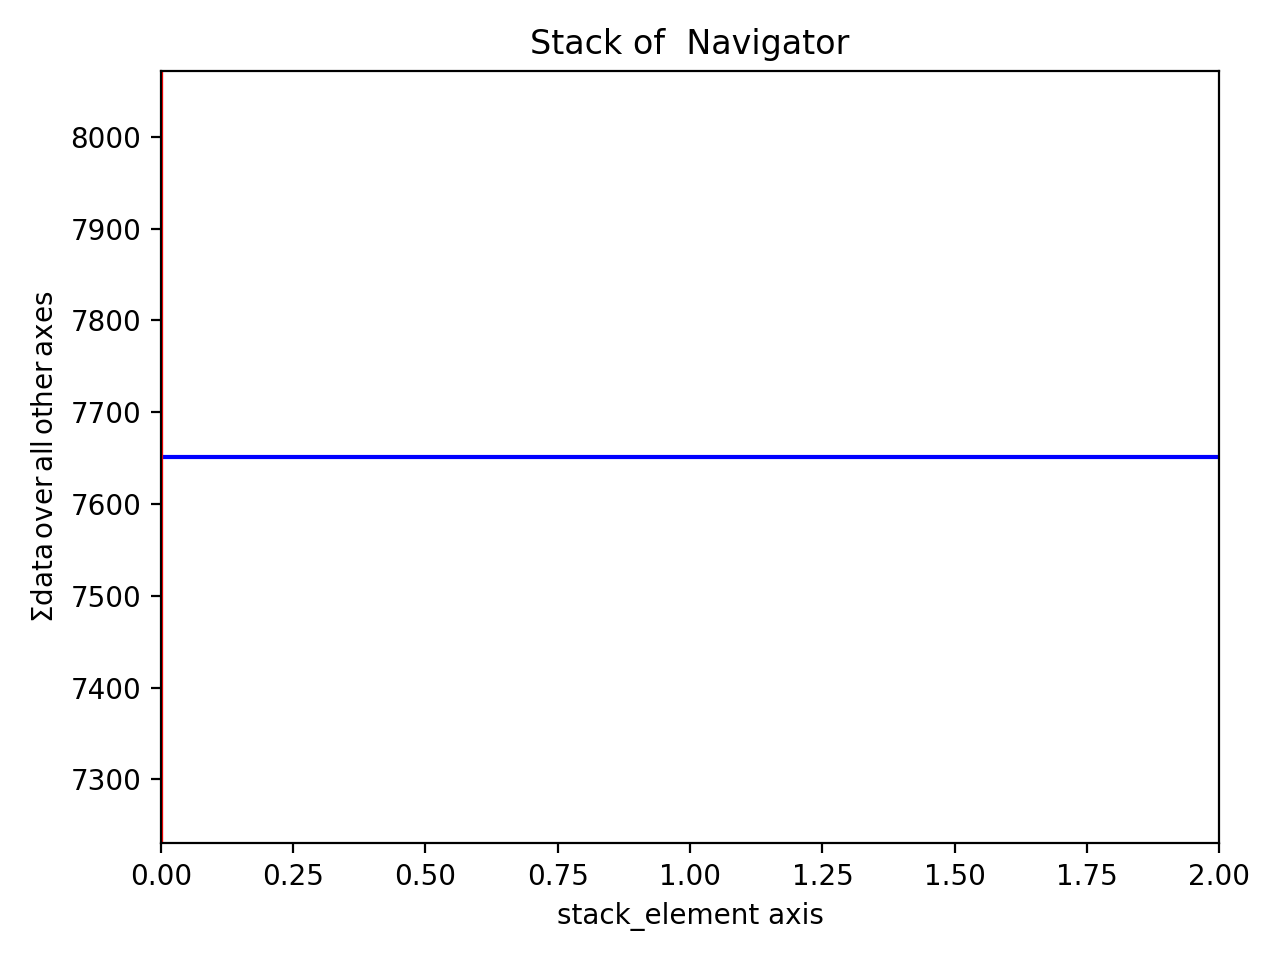

<IPython.core.display.Javascript object>


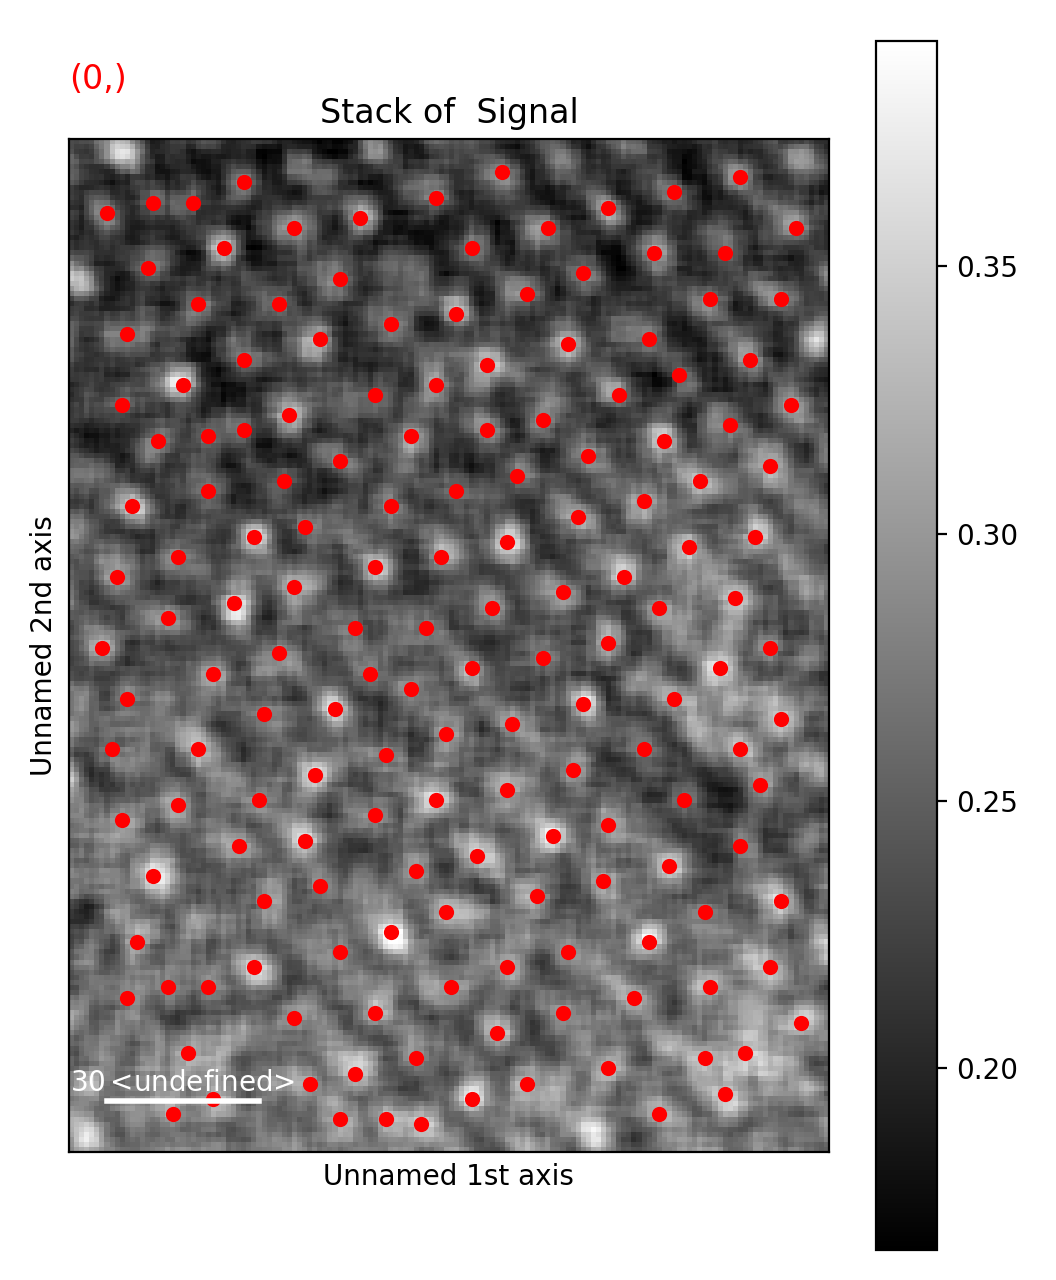

In [61]:
sublattice.get_position_history().plot()

In [62]:
atom_list = sublattice.atom_list
atom_list[0] 

<Atom_Position,  (x:69.3,y:194.0,sx:1.1,sy:1.6,r:1.3,e:1.4)>

In [110]:
sublattice.construct_zone_axes()
sublattice.plot_planes()

ValueError: Navigation shape of the marker must be 0 or the same navigation shape as this signal.

In [65]:
>>> import atomap.api as am
>>> s = am.dummy_data.get_atom_counting_signal()
>>> atom_positions = am.get_atom_positions(im02, separation=5)
>>> sublattice = am.Sublattice(atom_positions, im02)
>>> sublattice.construct_zone_axes()
>>> sublattice.refine_atom_positions_using_2d_gaussian()




Gaussian fitting:   0%|          | 0/165 [00:00<?, ?it/s]


Gaussian fitting:   4%|▎         | 6/165 [00:00<00:02, 53.55it/s]


Gaussian fitting:   8%|▊         | 13/165 [00:00<00:02, 56.80it/s]


Gaussian fitting:  13%|█▎        | 21/165 [00:00<00:02, 60.35it/s]


Gaussian fitting:  17%|█▋        | 28/165 [00:00<00:02, 62.17it/s]


Gaussian fitting:  21%|██        | 35/165 [00:00<00:02, 62.67it/s]


Gaussian fitting:  26%|██▌       | 43/165 [00:00<00:01, 65.00it/s]


Gaussian fitting:  30%|███       | 50/165 [00:00<00:01, 65.75it/s]


Gaussian fitting:  35%|███▍      | 57/165 [00:00<00:01, 66.49it/s]


Gaussian fitting:  39%|███▉      | 64/165 [00:00<00:01, 65.41it/s]


Gaussian fitting:  43%|████▎     | 71/165 [00:01<00:01, 65.11it/s]


Gaussian fitting:  47%|████▋     | 78/165 [00:01<00:01, 62.58it/s]


Gaussian fitting:  52%|█████▏    | 86/165 [00:01<00:01, 64.97it/s]


Gaussian fitting:  56%|█████▋    | 93/165 [00:01<00:01, 65.29it/s]


Gaussian fitting:  61%|██████    | 100/16

<IPython.core.display.Javascript object>


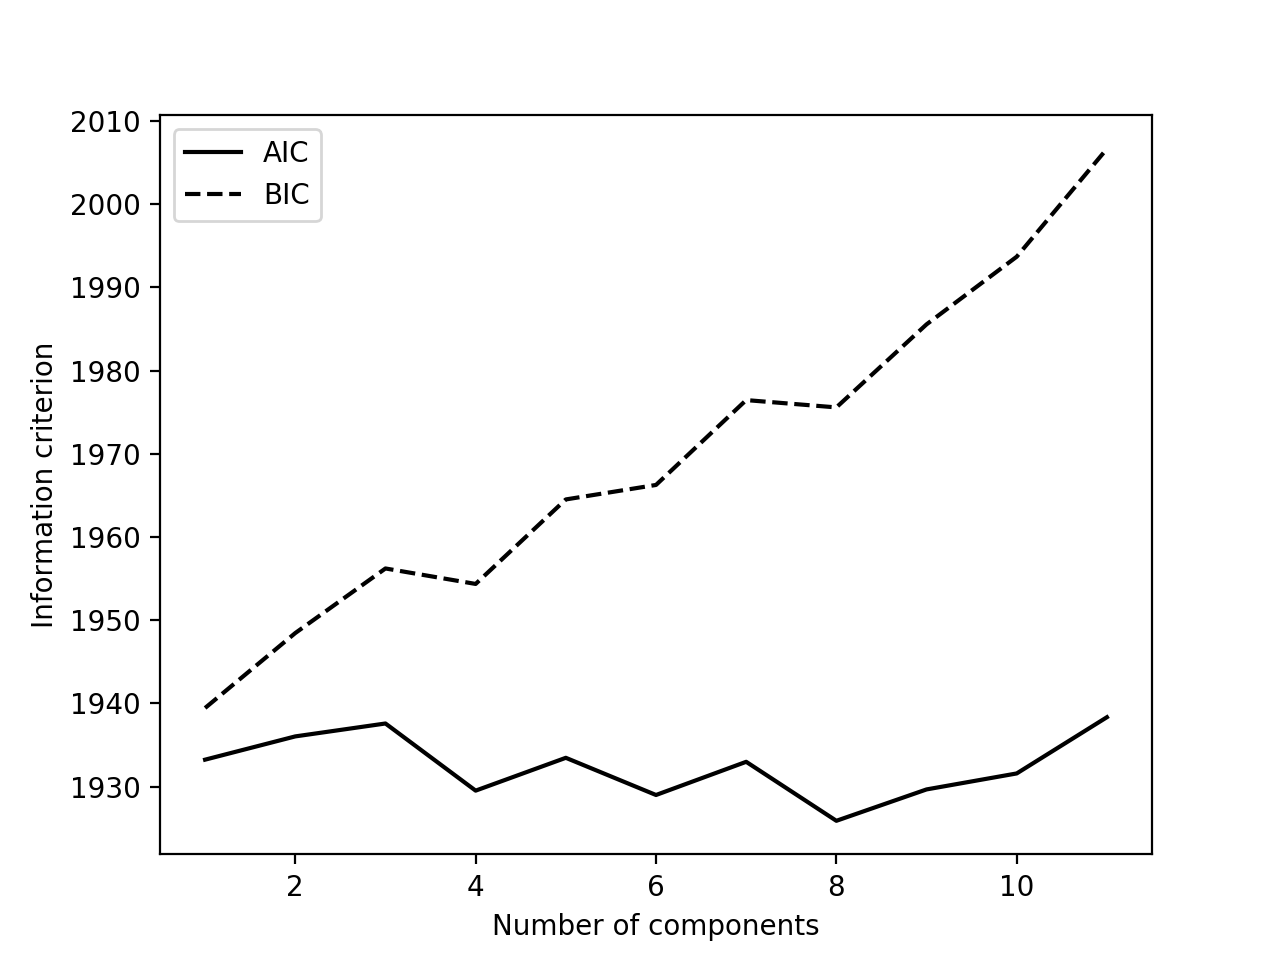

In [66]:
>>> models = am.quant.get_statistical_quant_criteria([sublattice], 12)


<IPython.core.display.Javascript object>


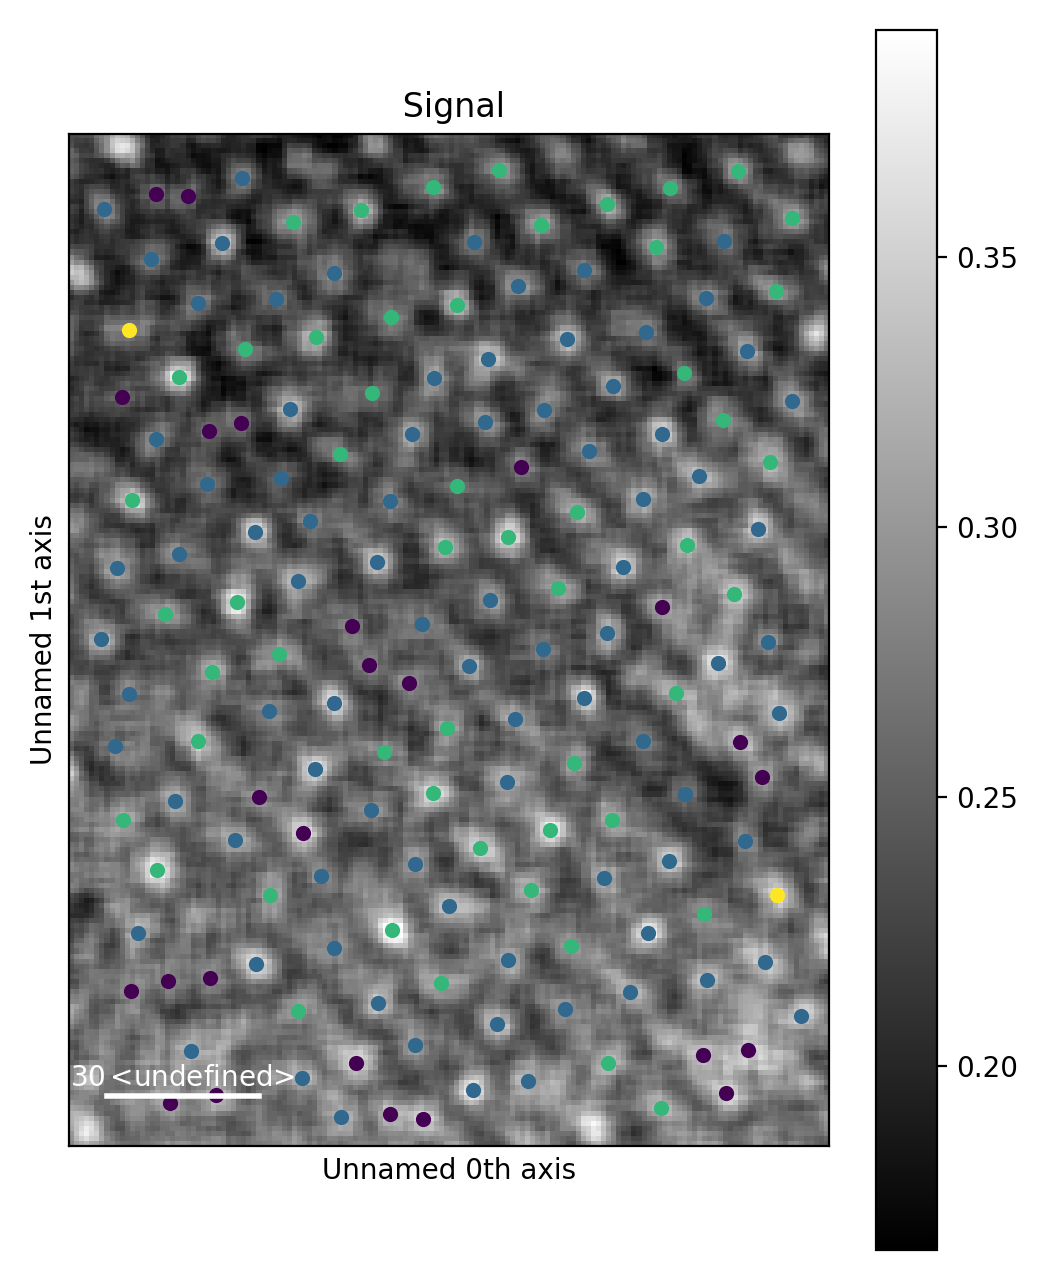

<IPython.core.display.Javascript object>


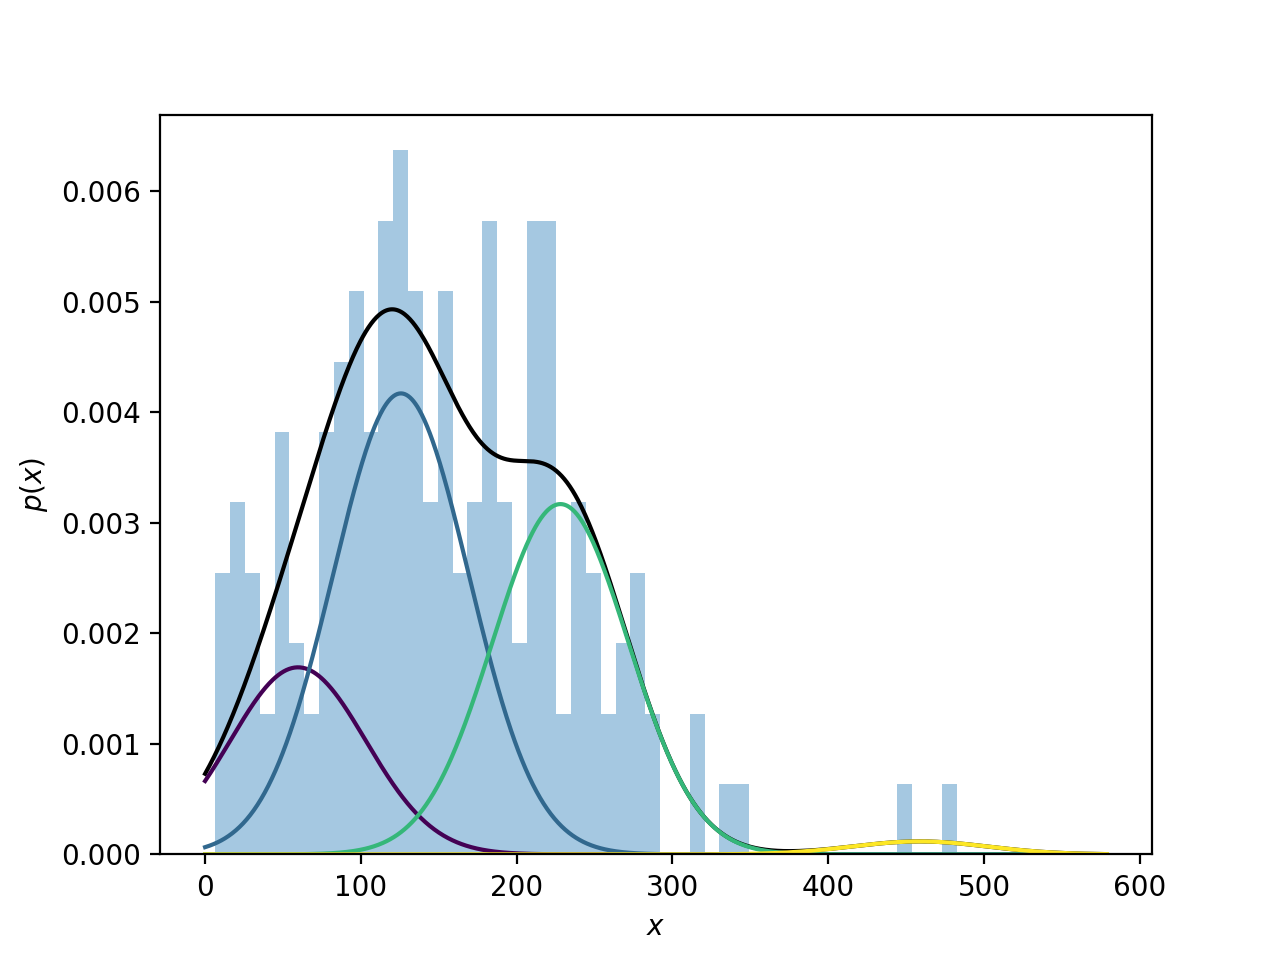

In [67]:
>>> model = models[3] # 4th model
>>> atom_lattice = am.quant.statistical_quant(sublattice.image, sublattice, model, 4)




Integrating:   0%|          | 0/165 [00:00<?, ?it/s]


Integrating:   5%|▌         | 9/165 [00:00<00:01, 84.45it/s]


Integrating:  10%|█         | 17/165 [00:00<00:01, 82.13it/s]


Integrating:  15%|█▌        | 25/165 [00:00<00:01, 79.16it/s]


Integrating:  20%|██        | 33/165 [00:00<00:01, 76.62it/s]


Integrating:  25%|██▍       | 41/165 [00:00<00:01, 77.59it/s]


Integrating:  30%|███       | 50/165 [00:00<00:01, 79.60it/s]


Integrating:  36%|███▌      | 59/165 [00:00<00:01, 81.03it/s]


Integrating:  41%|████      | 67/165 [00:00<00:01, 76.65it/s]


Integrating:  45%|████▌     | 75/165 [00:00<00:01, 72.85it/s]


Integrating:  50%|█████     | 83/165 [00:01<00:01, 72.76it/s]


Integrating:  55%|█████▌    | 91/165 [00:01<00:01, 73.80it/s]


Integrating:  61%|██████    | 100/165 [00:01<00:00, 76.38it/s]


Integrating:  65%|██████▌   | 108/165 [00:01<00:00, 75.36it/s]


Integrating:  70%|███████   | 116/165 [00:01<00:00, 75.97it/s]


Integrating:  75%|███████▌  | 124/165 [00:01

<IPython.core.display.Javascript object>


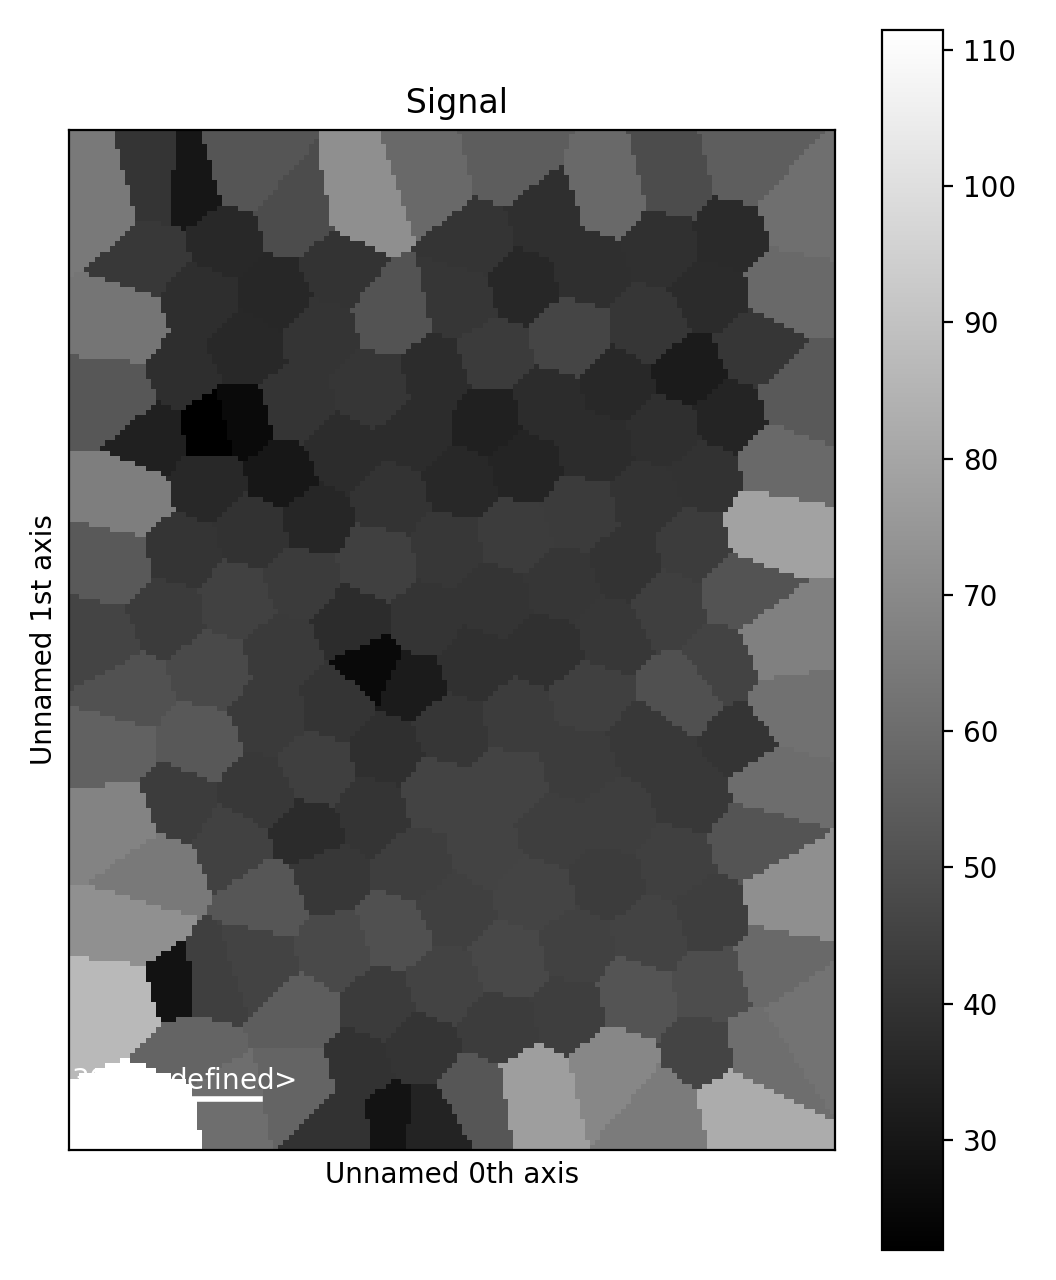

In [68]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity()
>>> i_record.plot()




Integrating:   0%|          | 0/165 [00:00<?, ?it/s]


Integrating:   5%|▍         | 8/165 [00:00<00:02, 74.66it/s]


Integrating:  10%|█         | 17/165 [00:00<00:01, 77.12it/s]


Integrating:  16%|█▌        | 26/165 [00:00<00:01, 78.06it/s]


Integrating:  21%|██        | 35/165 [00:00<00:01, 78.83it/s]


Integrating:  27%|██▋       | 44/165 [00:00<00:01, 79.83it/s]


Integrating:  32%|███▏      | 52/165 [00:00<00:01, 79.34it/s]


Integrating:  37%|███▋      | 61/165 [00:00<00:01, 80.60it/s]


Integrating:  42%|████▏     | 70/165 [00:00<00:01, 80.69it/s]


Integrating:  48%|████▊     | 79/165 [00:00<00:01, 80.81it/s]


Integrating:  53%|█████▎    | 88/165 [00:01<00:00, 80.91it/s]


Integrating:  59%|█████▉    | 97/165 [00:01<00:00, 81.15it/s]


Integrating:  64%|██████▍   | 106/165 [00:01<00:00, 81.30it/s]


Integrating:  70%|██████▉   | 115/165 [00:01<00:00, 81.45it/s]


Integrating:  75%|███████▌  | 124/165 [00:01<00:00, 81.50it/s]


Integrating:  81%|████████  | 133/165 [00:01

<IPython.core.display.Javascript object>


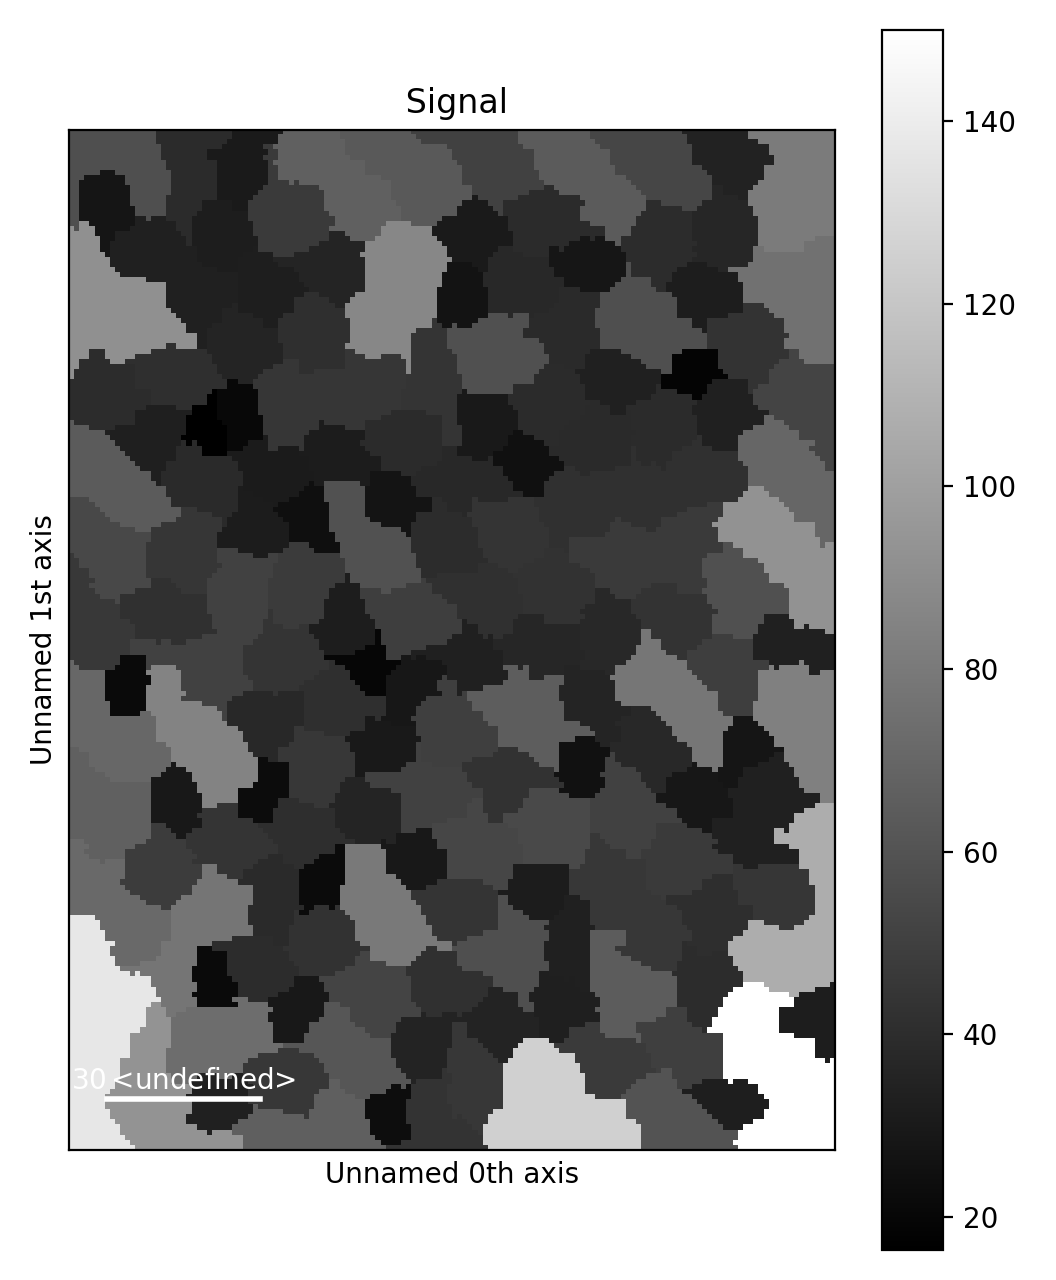

In [69]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity(
...         method='Watershed')
>>> i_record.plot()

Gaussian fitting: 100%|██████████| 104/104 [00:02<00:00, 49.46it/s]


<IPython.core.display.Javascript object>


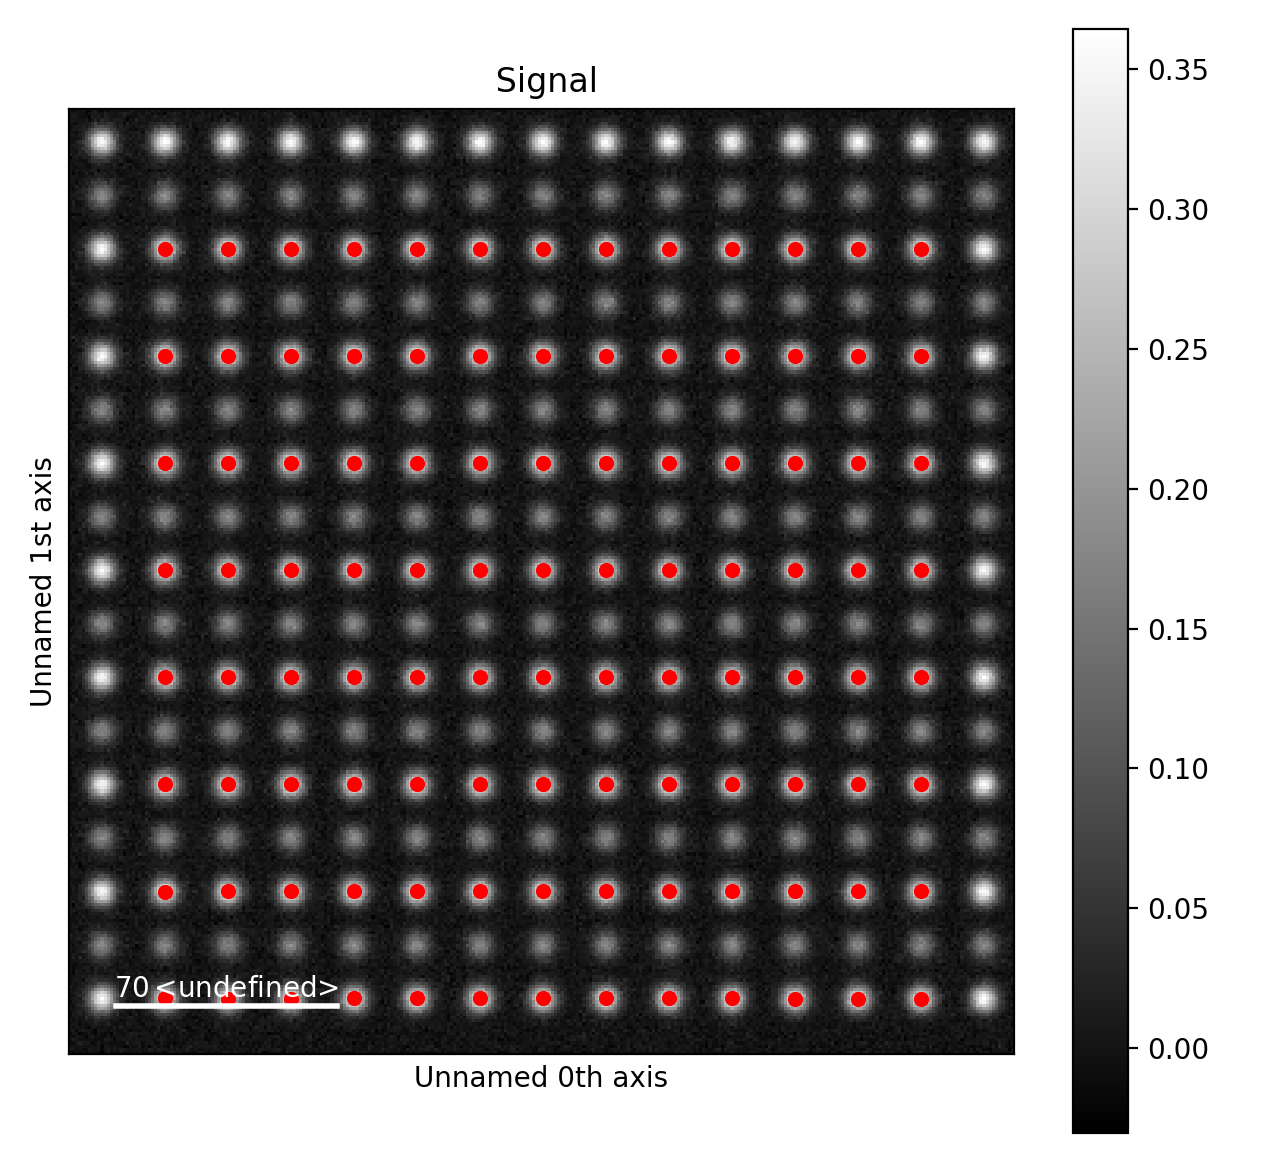

<IPython.core.display.Javascript object>


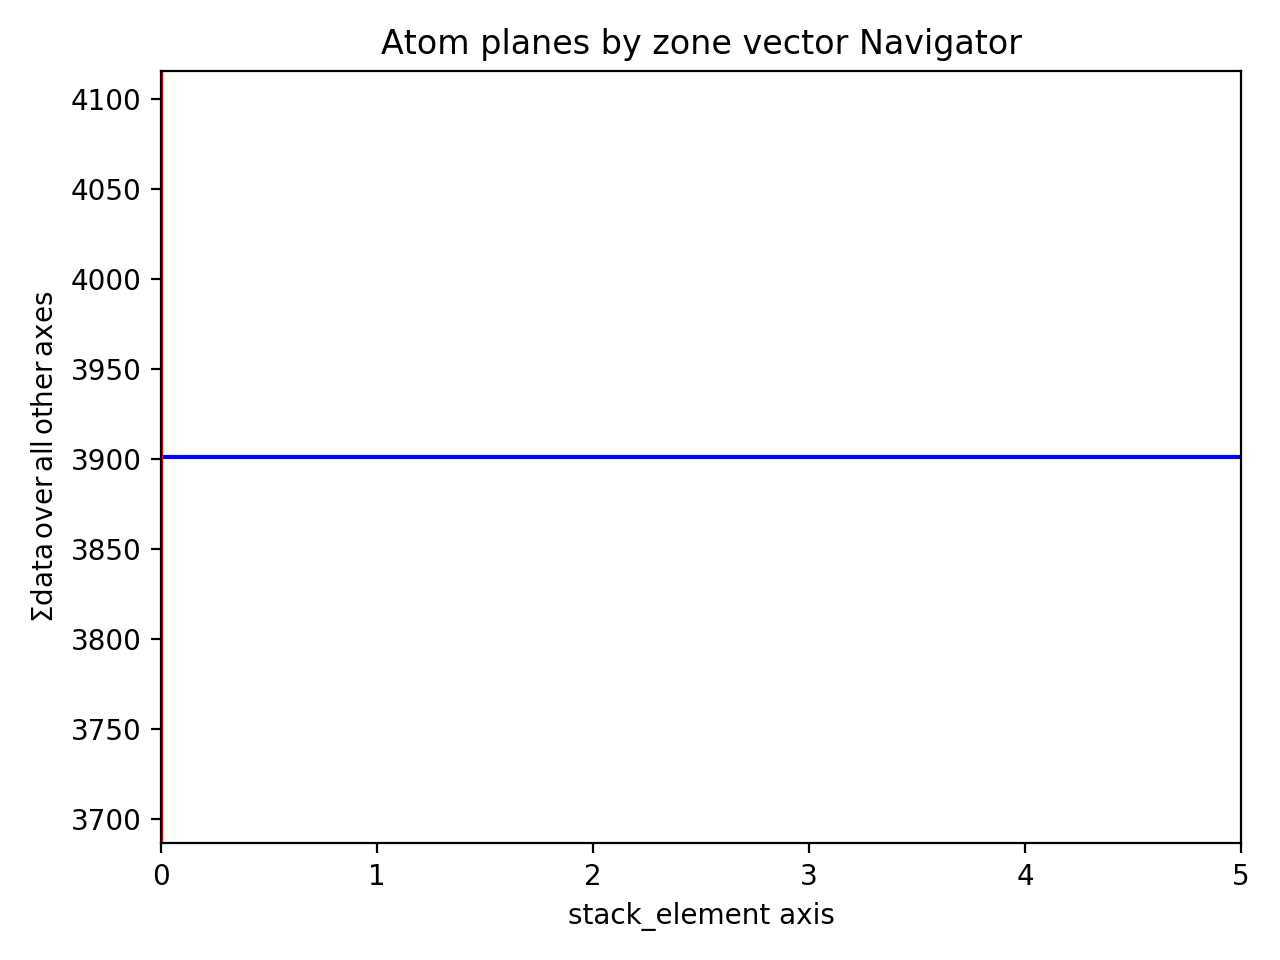

<IPython.core.display.Javascript object>


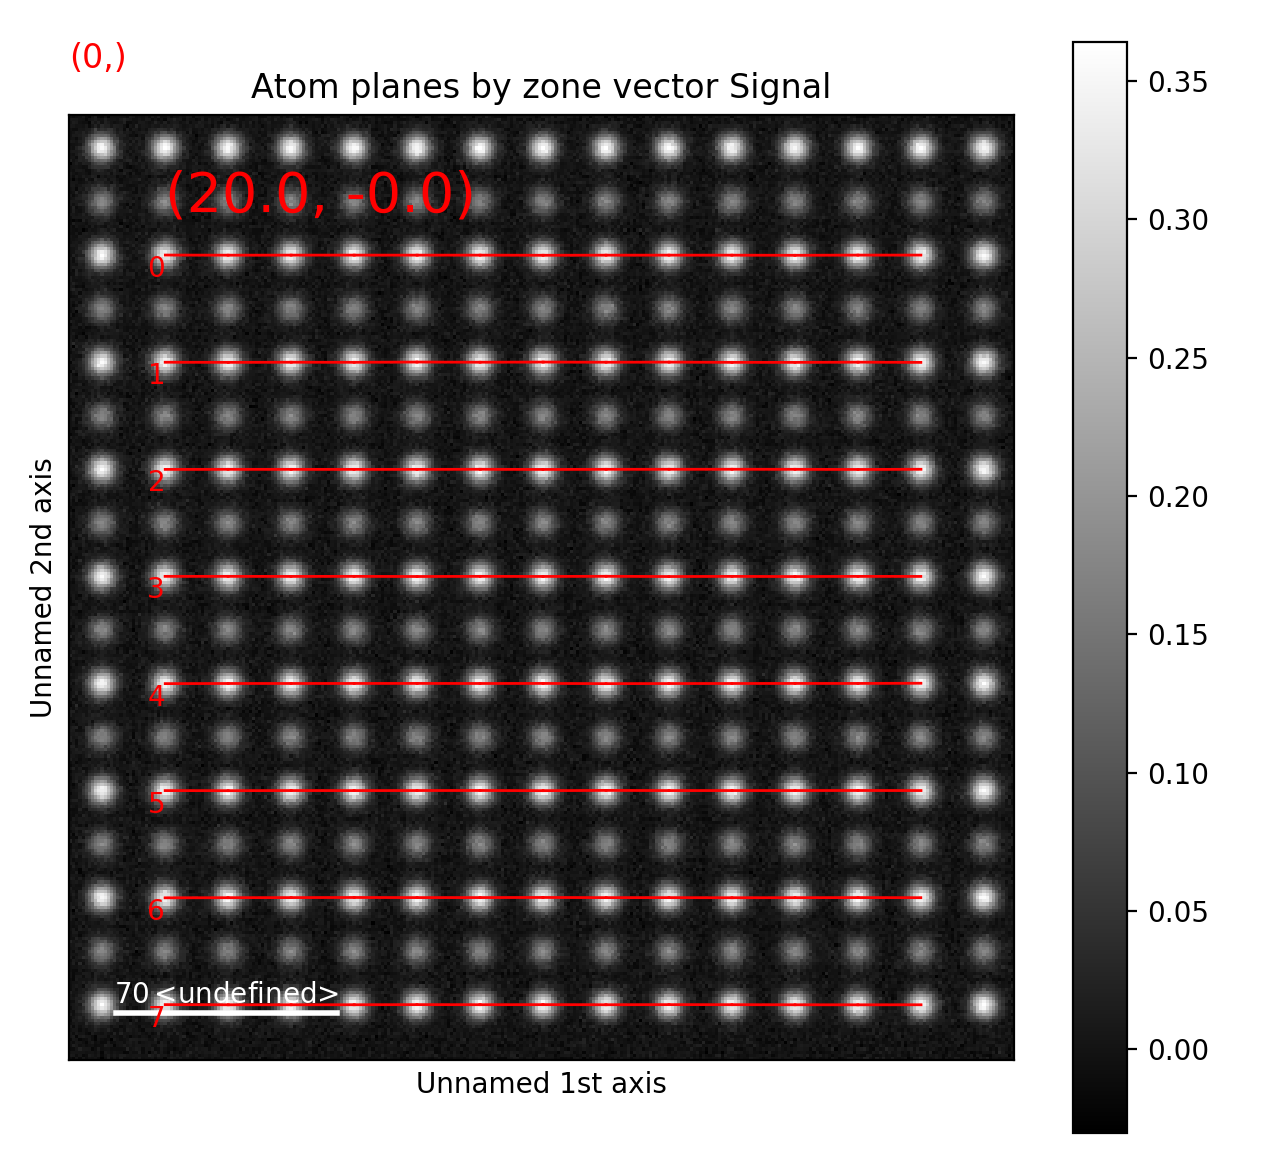

In [23]:
>>> s = dummy_data.get_two_sublattice_signal()
>>> A_positions = am.get_atom_positions(s, separation=15)
>>> sublattice_A = am.Sublattice(A_positions, image=s.data, color='r')
>>> sublattice_A.find_nearest_neighbors()
>>> sublattice_A.refine_atom_positions_using_center_of_mass()
>>> sublattice_A.refine_atom_positions_using_2d_gaussian()
>>> sublattice_A.construct_zone_axes()
>>> sublattice_A.plot()
>>> sublattice_A.plot_planes()

In [24]:
>>> zone_axis_001 = sublattice_A.zones_axis_average_distances[1]
>>> B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)

In [25]:
>>> from atomap.tools import remove_atoms_from_image_using_2d_gaussian
>>> image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Subtracting atoms: 100%|██████████| 104/104 [00:02<00:00, 44.15it/s]


In [26]:
>>> sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
>>> sublattice_B.construct_zone_axes()
>>> sublattice_B.refine_atom_positions_using_center_of_mass()
>>> sublattice_B.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 91/91 [00:01<00:00, 47.73it/s]


<IPython.core.display.Javascript object>


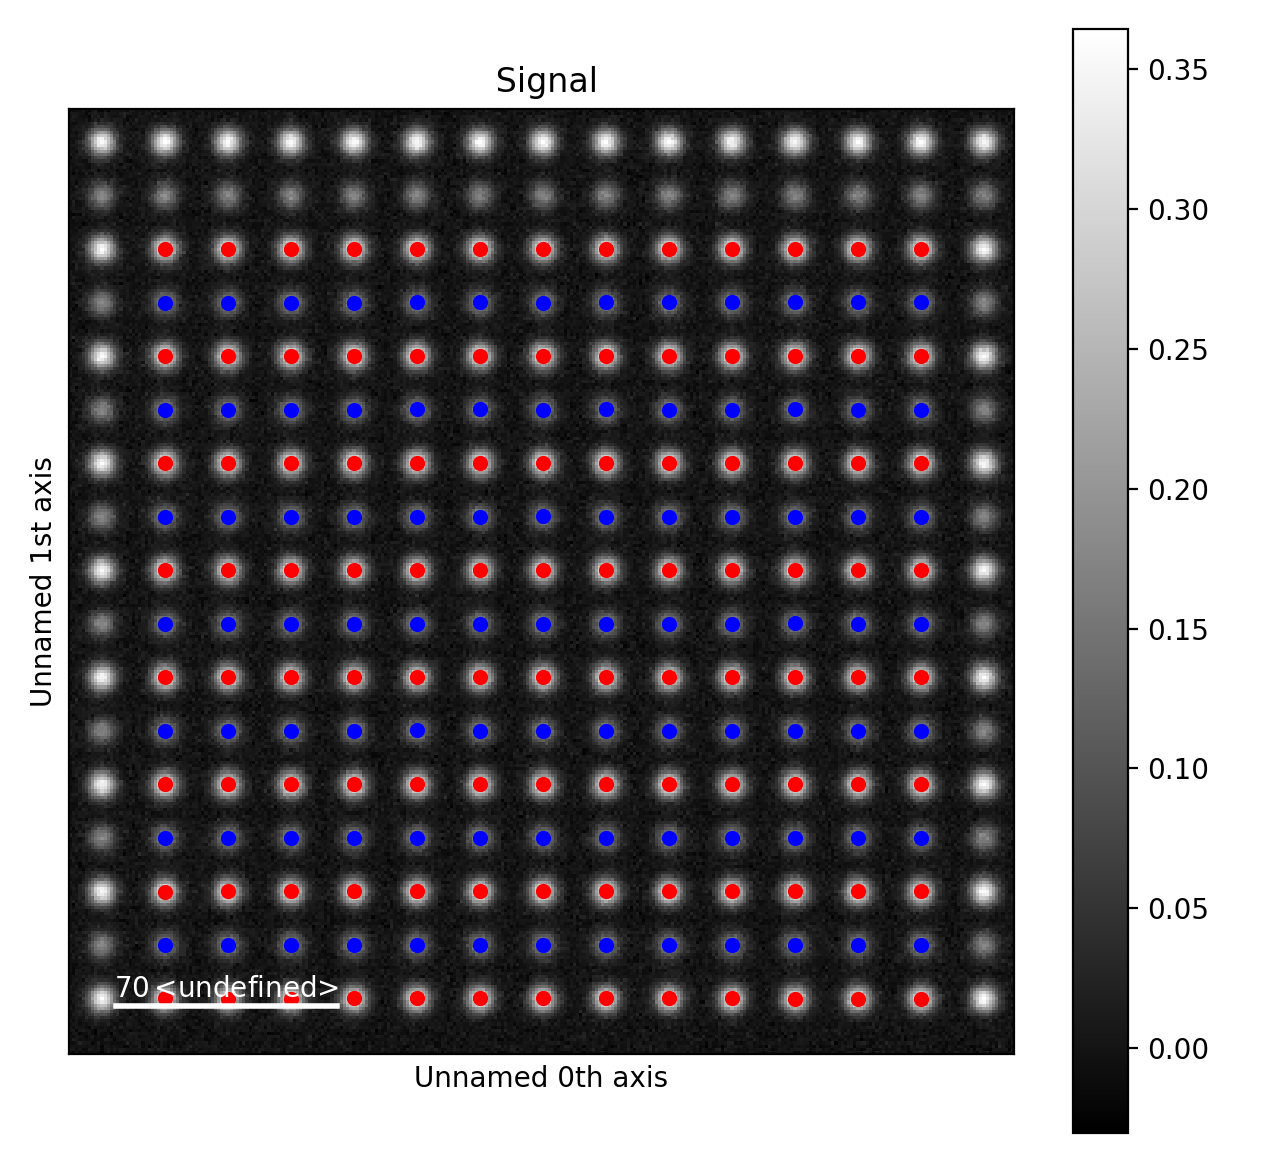

In [27]:
>>> atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
>>> atom_lattice.plot()

In [30]:
>>> zone = sublattice_A.zones_axis_average_distances[1]
>>> plane = sublattice_A.atom_planes_by_zone_vector[zone][7]
>>> s_elli_line = sublattice_A.get_ellipticity_line_profile(plane)

In [31]:
>>> position = s_elli_line.metadata.line_profile_data.x_list
>>> ellipticity = s_elli_line.metadata.line_profile_data.y_list
>>> standard_deviation = s_elli_line.metadata.line_profile_data.std_list

<IPython.core.display.Javascript object>


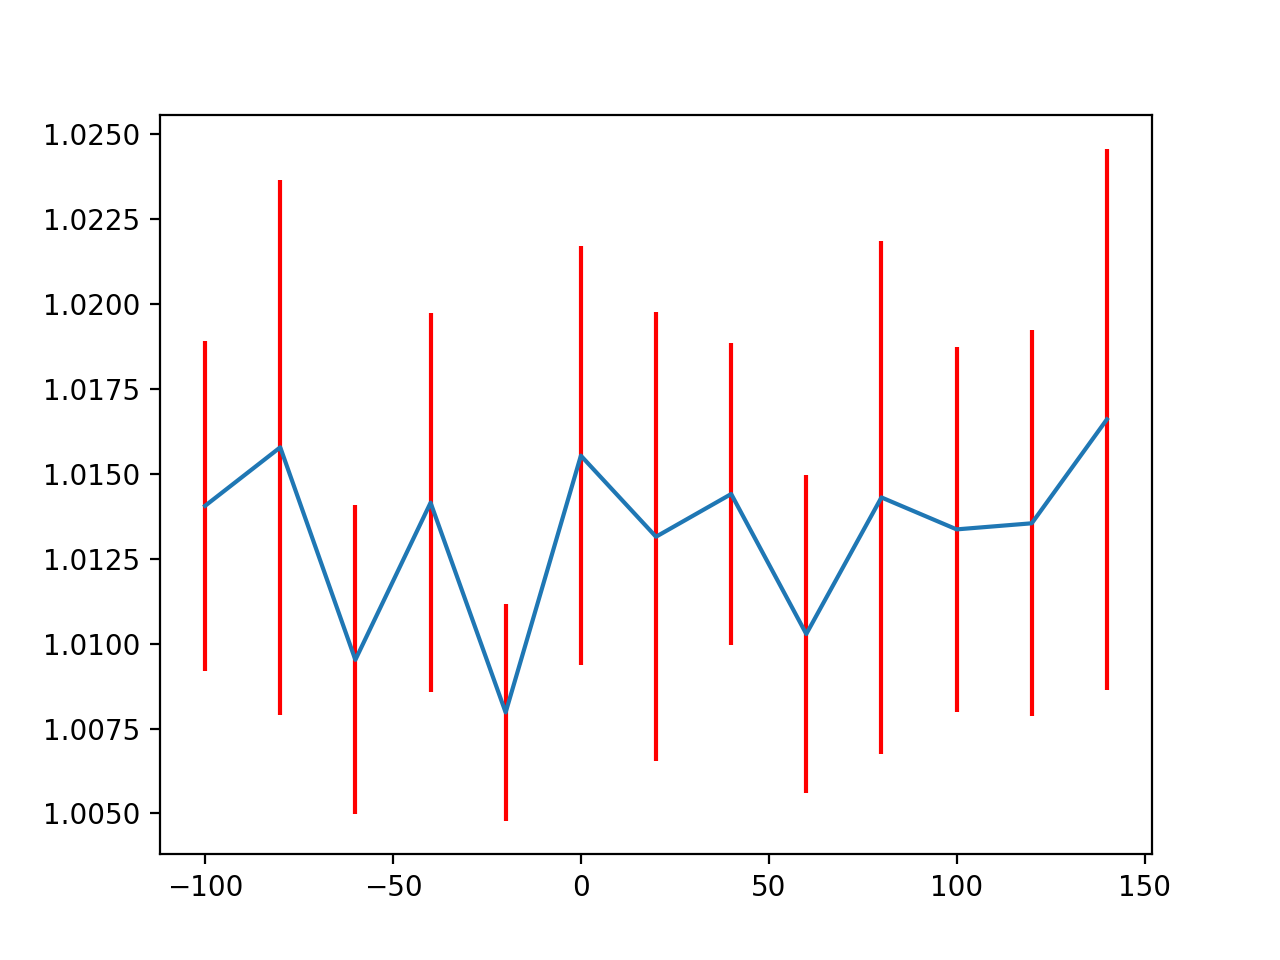

In [32]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> _ = ax.errorbar(position, ellipticity, yerr=standard_deviation, ecolor='red')
>>> fig.show()

In [33]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][0]
>>> s_monolayer_line = sublattice_B.get_monolayer_distance_line_profile(zone, plane)

In [34]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][-1]
>>> s_dd_line = sublattice_B.get_atom_distance_difference_line_profile(zone, plane)